In [1]:
import time
import numpy as np                 # package for numerics
import pandas as pd                # package for data frames  
import matplotlib.pyplot as plt    # package for plotting     

from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Cross validations 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

# Scores

from sklearn.metrics import mean_absolute_error as mae # Metric 
from sklearn.metrics import r2_score  as r2                 # Metric
from sklearn.metrics import mean_squared_error as mse  

# Optimisation 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Keras Model 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


# Other Visual etc 
import seaborn as sns
from matplotlib.patches import Patch  # Thi is a function to generate plot 
from matplotlib import cm
np.random.seed(1338)

# Optimization

from pyswarm import pso  

Using TensorFlow backend.


In [2]:
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# Import Data

In [3]:
df1= pd.read_csv("Data.csv", index_col='Datetime', parse_dates=True) 
df2= pd.read_csv("Data2020.csv", index_col='Datetime', parse_dates=True)
df = pd.concat([df1,df2 ])

In [4]:
features=df
features.insert(1,"SMeanT",df.MeanT-df.SetTemp)  # Insert Output
features.SMeanT=features.SMeanT.shift(-1)       # Shift output by 1 place !

# Put Windows to end
windows=['Win_AFT', 'Win_AFB','Win_ARoof', 'Win_Akip', 'Win_BFT', 'Win_BFB', 'Win_Broof', 'Win_BKip','Vfloor_A','Vfloor_B']
features = features[ [ col for col in features.columns if col not in windows ] + windows ]
Names=list(features.columns)
unwanted = { 'group', 'WindD','SMeanT', 'WindDc','hourC','hourS','Rain','SetTemp','Spa','MeanC','WindDC_nan','WindDs'}
Xnames = [e for e in Names if e not in unwanted]
features['group'] = (features.index -features.index[0]).days
features=features.loc[features.SMeanT.between(-3,4),:]
features=features.dropna(axis=0)


# Prapare Data 

In [5]:
train_inds, test_inds = next(GroupShuffleSplit(test_size=.30, n_splits=2, random_state = 40).split(features, groups=features['group']))

Train = features.iloc[train_inds]
Test = features.iloc[test_inds]

X = Train[Xnames].values
y = Train["SMeanT"].values  
print("X.shape:  ", X.shape)
print("y.shape:  ", y.shape)

X_test = Test[Xnames].values
y_test = Test["SMeanT"].values  
print("X.shape:  ", X_test.shape)
print("y.shape:  ", y_test.shape)

not_inds, use_inds = next(GroupShuffleSplit(test_size=.3, n_splits=2, random_state = 40).split(Test, groups=Test['group']))
use = Test.iloc[use_inds]
X_use = use[Xnames].values
y_use = use["SMeanT"].values 
print("X.shape:  ", X_use.shape)
print("y.shape:  ", y_use.shape)

X.shape:   (9830, 19)
y.shape:   (9830,)
X.shape:   (3987, 19)
y.shape:   (3987,)
X.shape:   (1208, 19)
y.shape:   (1208,)


In [6]:
group=Train.group
n_splits=5
cv=GroupShuffleSplit(n_splits,random_state=24) 
ng=len(np.unique(features["group"].values))

In [7]:
XnamesN=['T_out',
 'MeanT',
 'MeanRH',
 'WindMag',
 'DayE',
 'DayW',
 'WindD_E',
 'WindD_P',
 'WindD_W',
 'Win_FTW',
 'Win_FBW',
 'Win_RoofW',
 'Win_KipW',
 'Win_FTE',
 'Win_FBE',
 'Win_RoofE',
 'Win_KipE',
 'VentW',
 'VentE']

In [8]:
Data=features[Xnames]
Data['SetT']=features.SetTemp
Data['MeanC']=features.MeanC
Data['Output']=features.SMeanT
#Data['DeltaT']=features.T_out-features.MeanT
#Data['DeltaT']=features.Spa

C:\Users\au327049\Conda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\au327049\Conda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\au327049\Conda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [9]:
XnamesN2=['T_out',
 'MeanT',
 'MeanRH',
 'WindMag',
 'DayE',
 'DayW',
 'WindD_E',
 'WindD_P',
 'WindD_W',
 'Win_FTW',
 'Win_FBW',
 'Win_RoofW',
 'Win_KipW',
 'Win_FTE',
 'Win_FBE',
 'Win_RoofE',
 'Win_KipE',
 'VentW',
 'VentE',
 'SetTemp','MeanC','DeltaSetT']

# Inspect Data

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


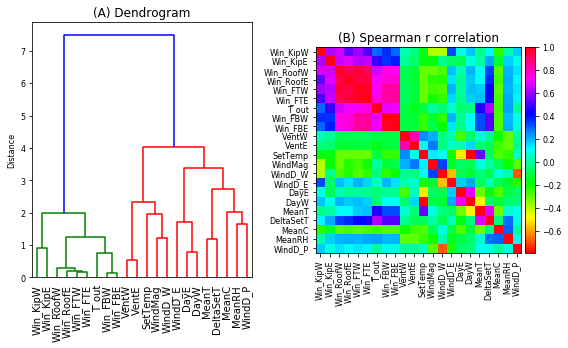

In [10]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


from collections import defaultdict
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

Names=list(Data.columns)
feature_names = np.r_[XnamesN2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8/1.618))
corr = spearmanr(Data).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=feature_names, ax=ax1,
                              leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))
ax1.set_ylabel('Distance')
im1=ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']],cmap=plt.get_cmap('hsv'))

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im1, cax=cax)

#fig.colorbar(im1, ax=ax2)
ax2.set_xticks(dendro_idx)
ax2.set_title('(B) Spearman r correlation')
ax1.set_title('(A) Dendrogram')
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()

plt.savefig('Corelation.png',dpi=600)
plt.show()


# Load  ANN

In [11]:

GPData=pd.read_csv("GP_Model.csv")
ANNData=pd.read_csv("ANN_Model.csv")


In [12]:
OriginalX=use[Xnames[9:19]] # get original X
OriginalX.columns=XnamesN[9:19]
OptimumXGP=GPData.iloc[:,3:13]
OptimumXGP['Datetime']=OriginalX.index[:-1]                       # Make dataframe of optimum X
OptimumXGP.set_index('Datetime', inplace=True)
OptimumXGP.columns =XnamesN[9:19]

C:\Users\au327049\Conda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
OptimumXANN=ANNData.iloc[:,3:13]
OptimumXANN['Datetime']=OriginalX.index[:-1]                       # Make dataframe of optimum X
OptimumXANN.set_index('Datetime', inplace=True)
OptimumXANN.columns =XnamesN[9:19]

C:\Users\au327049\Conda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Statistical analysis of two optimizized 

In [14]:
ANNp=mae(ANNData.Optimum,ANNData.GroundTruth)

print(ANNp)
GPp=mae(GPData.Optimum,GPData.GroundTruth)
print(GPp)

0.521008501483632
0.35308677880530265


In [15]:
print(np.mean(abs(ANNData.GroundTruth)-abs(ANNData.Optimum)))

print(np.mean(abs(GPData.GroundTruth)-abs(GPData.Optimum)))

0.4203642627150701
0.23734380454708393


improvement is 0.5338014638681157
Percentage of improvement 87.986743993372


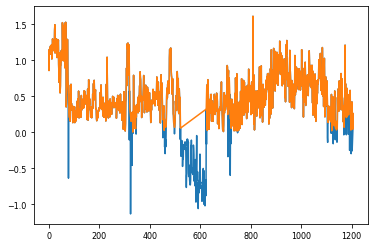

In [16]:
# MSE When system improved 

improve=abs(ANNData.GroundTruth)-abs(ANNData.Optimum)
plt.plot(improve)
improve2=improve[improve>0]
plt.plot(improve2)
print('improvement is',np.mean(improve2))
print('Percentage of improvement', len(improve2)/len(improve)*100)

improvement is 0.4038778885960226
Percentage of improvement 72.4109362054681


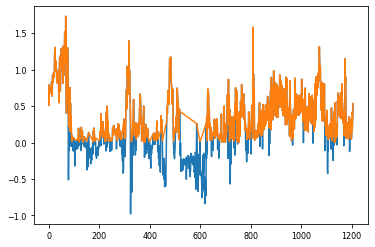

In [17]:
improve=abs(ANNData.GroundTruth)-abs(GPData.Optimum)
plt.plot(improve)
improve2=improve[improve>=0]
plt.plot(improve2)
np.mean(improve2)
print('improvement is',np.mean(improve2))
print('Percentage of improvement', len(improve2)/len(improve)*100)

improvement is -0.41046544504033405
Percentage of improvement 12.013256006628003
improvement is -0.19974565328706828
Percentage of improvement 27.5890637945319


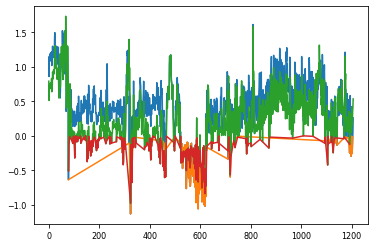

In [18]:

improve=abs(ANNData.GroundTruth)-abs(ANNData.Optimum)
plt.plot(improve)
improve2=improve[improve<0]
plt.plot(improve2)
print('improvement is',np.mean(improve2))
print('Percentage of improvement', len(improve2)/len(improve)*100)

improve=abs(ANNData.GroundTruth)-abs(GPData.Optimum)
plt.plot(improve)
improve2=improve[improve<=0]
plt.plot(improve2)
np.mean(improve2)
print('improvement is',np.mean(improve2))
print('Percentage of improvement', len(improve2)/len(improve)*100)

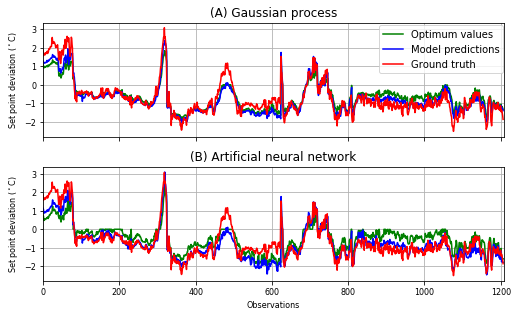

In [19]:
fig, ax = plt.subplots(2,sharex=True)
fig.set_size_inches(7.3,7.3/1.618)
#fig.set_size_inches(7.3,7.3/1.5)


ax[0].plot(GPData.Optimum,'g',label='Optimum values')
ax[0].plot((GPData.Prediction),'b',label='Model predictions')
ax[0].plot((GPData.GroundTruth),'r',label='Ground truth')
#ax[0].legend()
#ax[0].set_xlabel('Observations')
ax[0].legend(loc='upper right',bbox_to_anchor=(1.01,1.02))
ax[0].set_ylabel('Set point deviation ($^\circ$C)')
ax[0].grid()
#ax[0].set_ylim((-0.5, 3.5))
ax[0].set_title('(A) Gaussian process')


ax[1].plot(ANNData.Optimum,'g',label='Optimum values')
ax[1].plot((ANNData.Prediction),'b',label='Model predictions')
ax[1].plot((ANNData.GroundTruth),'r',label='Ground truth')

ax[1].set_xlabel('Observations')
ax[1].set_ylabel('Set point deviation ($^\circ$C)')
ax[1].grid()
ax[1].set_xlim((0, 1208))
#ax[1].set_ylim((-0.5, 3.5))
ax[1].set_title('(B) Artificial neural network')
plt.tight_layout()
plt.savefig('Optimum.png',dpi=600)

In [20]:
OriginalX.head()

,Win_FTW,Win_FBW,Win_RoofW,Win_KipW,Win_FTE,Win_FBE,Win_RoofE,Win_KipE,VentW,VentE
Datetime,,,,,,,,,,
2018-09-06 23:50:00,12.07467,15.601381,17.400787,24.175412,12.07467,12.788780,17.400787,23.531352,4681.731,4569.753
2018-09-07 00:00:00,12.07467,15.601381,17.400787,24.175412,12.07467,13.140928,17.400787,23.657918,4568.120,4685.015
2018-09-07 02:10:00,12.07467,15.601381,17.400787,24.175412,12.07467,12.788780,17.400787,23.531352,4495.193,4318.581
2018-09-07 02:20:00,12.07467,15.601381,17.400787,24.175412,12.07467,12.788780,17.400787,23.531352,4580.563,4507.562
2018-09-07 03:20:00,12.07467,15.601381,17.400787,24.175412,12.07467,12.788780,17.400787,23.531352,4539.423,4395.174


In [21]:
OptimumXANN.head()

,Win_FTW,Win_FBW,Win_RoofW,Win_KipW,Win_FTE,Win_FBE,Win_RoofE,Win_KipE,VentW,VentE
Datetime,,,,,,,,,,
2018-09-06 23:50:00,8.624769,16.0,18.0,24.2,8.624764,9.134843,12.429134,24.2,4661.443385,5026.728300
2018-09-07 00:00:00,8.624764,16.0,18.0,24.2,8.624764,9.386377,12.429134,24.2,4720.965899,5022.827627
2018-09-07 02:10:00,8.624764,16.0,18.0,24.2,8.624764,9.134843,12.429134,24.2,4642.352745,4750.439100
2018-09-07 02:20:00,8.624764,16.0,18.0,24.2,8.624764,9.134843,12.429134,24.2,4107.414194,4452.484301
2018-09-07 03:20:00,8.624764,16.0,18.0,24.2,8.624764,9.134843,12.429134,24.2,3988.851740,4283.120338


In [22]:
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

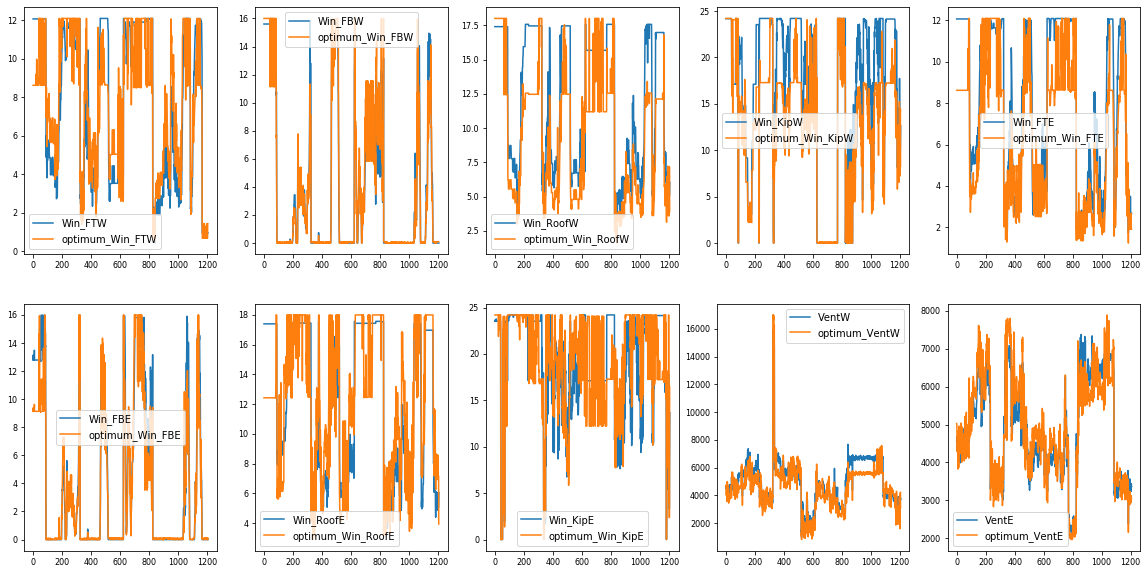

In [37]:
fig, axs = plt.subplots(2,5)
fig.set_size_inches(20,10)
axs = axs.flatten()
for i, col in enumerate(OptimumXANN.columns):
    axs[i].plot(OriginalX[col].values, label=col)
    axs[i].plot(OptimumXANN[col].values, label='optimum_'+col)
    axs[i].legend(loc='best')
plt.show()

In [38]:
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)


In [39]:
PP=np.arange(1040,1052)
# Sep,-07, 52-70
# Apr 07, 1040,1052
OriginalX2=OriginalX.iloc[PP]
OptimumX2=OptimumXANN.iloc[PP]
OptimumX3=OptimumXGP.iloc[PP]
OutputANN=ANNData.Optimum[PP]
OutputGP=GPData.Optimum[PP]

OriginalInput=use[Xnames[0:9]]
OriginalInputX2= OriginalInput.iloc[PP]
OriginalOutput=use["SMeanT"]
OriginalOutputX2=OriginalOutput.iloc[PP]

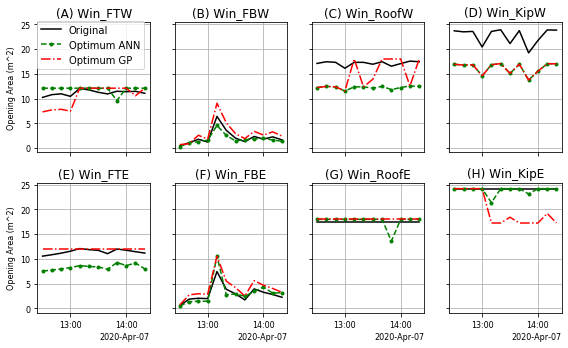

In [42]:
import datetime
tt=['(A) ','(B) ','(C) ','(D) ','(E) ','(F) ','(G) ','(H) ','(I) ','(J) ']
import matplotlib.dates as mdates
import matplotlib.units as munits
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
hours = mdates.HourLocator(interval = 1)


fig, ax= plt.subplots(2,4,sharex=True,sharey=True)
ax = ax.flatten()
fig.set_size_inches(8,(8/1.618))
for i, col in enumerate(OriginalX.columns[:8]):
    #ax[i] =fig.add_subplot(5,2,i+1)
    ax[i].plot(OriginalX2[col], 'k',label='Original')
    ax[i].plot(OptimumX2[col],'--.g' ,label='Optimum ANN')
    ax[i].plot(OptimumX3[col],'-.r' ,label='Optimum GP')
    #ax[i].legend()
    ax[i].set_title(tt[i] +  col)
    ax[i].grid()
    ax[i].xaxis.set_major_locator(hours)
ax[0].legend(loc='upper left',bbox_to_anchor=(-.05,1.05))
ax[0].set_ylabel('Opening Area (m^2)')
ax[4].set_ylabel('Opening Area (m^2)')
plt.tight_layout()
plt.savefig('WindowApr07.png',dpi=600)
plt.show()

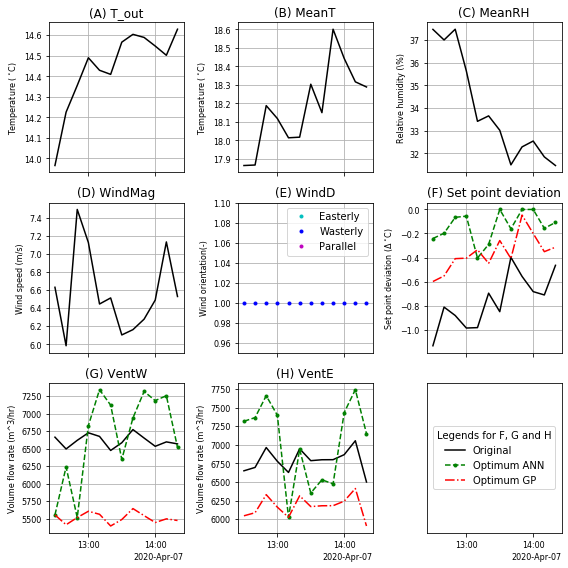

In [43]:


fig, ax= plt.subplots(3,3,sharex=True)
ax = ax.flatten()
fig.set_size_inches(8,(8))
for i, col in enumerate(OriginalInputX2.columns[0:4]):
    #ax[i] =fig.add_subplot(5,2,i+1)
    ax[i].plot(OriginalInputX2[col], 'k',label='orginal')
    #ax[i].legend()
    ax[i].set_title(tt[i] +  col)
    ax[i].grid()
    ax[i].xaxis.set_major_locator(hours)
    
for i, col in enumerate(OriginalX.columns[8:11]):
    #ax[i] =fig.add_subplot(5,2,i+1)
    ax[i+6].plot(OriginalX2[col], 'k',label='Original')
    ax[i+6].plot(OptimumX2[col],'--.g' ,label='Optimum ANN')
    ax[i+6].plot(OptimumX3[col],'-.r' ,label='Optimum GP')
    #ax[i].legend()
    ax[i+6].set_title(tt[i+6] +  col)
    ax[i+6].set_ylabel('Volume flow rate (m^3/hr)')
    ax[i+6].grid()
    ax[i+6].xaxis.set_major_locator(hours)

ax[0].set_ylabel('Temperature ($^\circ$C)')
ax[1].set_ylabel('Temperature ($^\circ$C)')
ax[2].set_ylabel('Relative humidity (\%)')
ax[3].set_ylabel('Wind speed (m/s)')
ax[4].set_ylabel('Wind orientation(-)')
ax[5].set_ylabel('Set point deviation ($ \Delta ^\circ$C)')

ax[4].grid()
ax[5].grid()


ax[3].set_title('(D) WindMag')
ax[4].set_title('(E) WindD')
ax[4].plot(OriginalInputX2['WindDC_E'],'.c', label='Easterly')
ax[4].plot(OriginalInputX2['WindDC_W'],'.b', label='Wasterly')
ax[4].plot(OriginalInputX2['WindDC_P'],'.m', label='Parallel')
ax[4].legend()
ax[4].set_ylim((0.95, 1.1))
ax[5].set_title('(F) Set point deviation')
p1,=ax[5].plot(OriginalOutputX2,'k',label='Original')
p2,=ax[5].plot(OriginalOutputX2.index,OutputANN,'--.g',label='Optimum ANN')
p3,=ax[5].plot(OriginalOutputX2.index,OutputGP,'-.r', label='Optimum GP')
#ax[7].legend(loc='lower right',bbox_to_anchor=(1,0))

ax[8].legend(handles=[p1, p2,p3], title='Legends for F, G and H',  loc='center')

ax[4].xaxis.set_major_locator(hours)
ax[5].xaxis.set_major_locator(hours)
plt.tight_layout()
ax[8].set_yticks([])
plt.tight_layout()
plt.savefig('WeatherApr07.png',dpi=600)
plt.show()

In [44]:
PP=np.arange(52,70)
# Sep,-07, 52-70
# Apr 07, 1040,1052
OriginalX2=OriginalX.iloc[PP]
OptimumX2=OptimumXANN.iloc[PP]
OptimumX3=OptimumXGP.iloc[PP]
OutputANN=ANNData.Optimum[PP]
OutputGP=GPData.Optimum[PP]

OriginalInput=use[Xnames[0:9]]
OriginalInputX2= OriginalInput.iloc[PP]
OriginalOutput=use["SMeanT"]
OriginalOutputX2=OriginalOutput.iloc[PP]

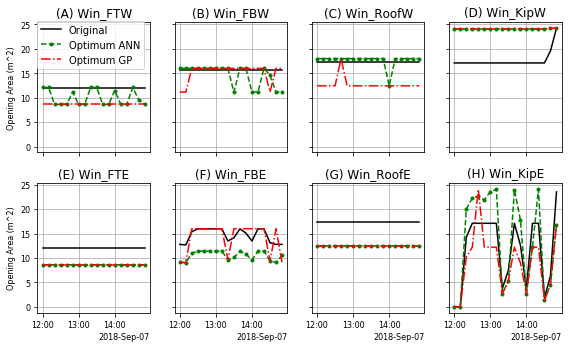

In [46]:
import datetime
tt=['(A) ','(B) ','(C) ','(D) ','(E) ','(F) ','(G) ','(H) ','(I) ','(J) ']
import matplotlib.dates as mdates
import matplotlib.units as munits
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
hours = mdates.HourLocator(interval = 1)


fig, ax= plt.subplots(2,4,sharex=True,sharey=True)
ax = ax.flatten()
fig.set_size_inches(8,(8/1.618))
for i, col in enumerate(OriginalX.columns[:8]):
    #ax[i] =fig.add_subplot(5,2,i+1)
    ax[i].plot(OriginalX2[col], 'k',label='Original')
    ax[i].plot(OptimumX2[col],'--.g' ,label='Optimum ANN')
    ax[i].plot(OptimumX3[col],'-.r' ,label='Optimum GP')
    #ax[i].legend()
    ax[i].set_title(tt[i] +  col)
    ax[i].grid()
    ax[i].xaxis.set_major_locator(hours)
ax[0].legend(loc='upper left',bbox_to_anchor=(-.05,1.05))
ax[0].set_ylabel('Opening Area (m^2)')
ax[4].set_ylabel('Opening Area (m^2)')
plt.tight_layout()
plt.savefig('WindowSep07.png',dpi=600)
plt.show()

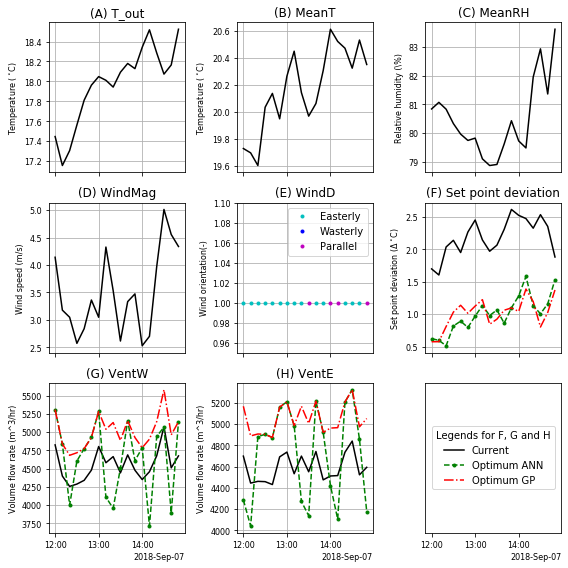

In [33]:


fig, ax= plt.subplots(3,3,sharex=True)
ax = ax.flatten()
fig.set_size_inches(8,(8))
for i, col in enumerate(OriginalInputX2.columns[0:4]):
    #ax[i] =fig.add_subplot(5,2,i+1)
    ax[i].plot(OriginalInputX2[col], 'k',label='orginal')
    #ax[i].legend()
    ax[i].set_title(tt[i] +  col)
    ax[i].grid()
    ax[i].xaxis.set_major_locator(hours)
    
for i, col in enumerate(OriginalX.columns[8:11]):
    #ax[i] =fig.add_subplot(5,2,i+1)
    ax[i+6].plot(OriginalX2[col], 'k',label='Orginal')
    ax[i+6].plot(OptimumX2[col],'--.g' ,label='optimum ANN')
    ax[i+6].plot(OptimumX3[col],'-.r' ,label='optimum GP')
    #ax[i].legend()
    ax[i+6].set_title(tt[i+6] +  col)
    ax[i+6].set_ylabel('Volume flow rate (m^3/hr)')
    ax[i+6].grid()
    ax[i+6].xaxis.set_major_locator(hours)

ax[0].set_ylabel('Temperature ($^\circ$C)')
ax[1].set_ylabel('Temperature ($^\circ$C)')
ax[2].set_ylabel('Relative humidity (\%)')
ax[3].set_ylabel('Wind speed (m/s)')
ax[4].set_ylabel('Wind orientation(-)')
ax[5].set_ylabel('Set point deviation ($ \Delta ^\circ$C)')

ax[4].grid()
ax[5].grid()


ax[3].set_title('(D) WindMag')
ax[4].set_title('(E) WindD')
ax[4].plot(OriginalInputX2['WindDC_E'],'.c', label='Easterly')
ax[4].plot(OriginalInputX2['WindDC_W'],'.b', label='Wasterly')
ax[4].plot(OriginalInputX2['WindDC_P'],'.m', label='Parallel')
ax[4].legend()
ax[4].set_ylim((0.95, 1.1))
ax[5].set_title('(F) Set point deviation')
p1,=ax[5].plot(OriginalOutputX2,'k',label='Current')
p2,=ax[5].plot(OriginalOutputX2.index,OutputANN,'--.g',label='Optimum ANN')
p3,=ax[5].plot(OriginalOutputX2.index,OutputGP,'-.r', label='Optimum GP')
#ax[7].legend(loc='lower right',bbox_to_anchor=(1,0))

ax[8].legend(handles=[p1, p2,p3], title='Legends for F, G and H',  loc='center')

ax[4].xaxis.set_major_locator(hours)
ax[5].xaxis.set_major_locator(hours)
plt.tight_layout()
ax[8].set_yticks([])
plt.tight_layout()
plt.savefig('WeatherSep072.png',dpi=600)
plt.show()

In [31]:
use.SetTemp[PP]
#use.head()
use.dayW[PP]

Datetime
2018-09-07 12:00:00    35.919792
2018-09-07 12:10:00    35.926736
2018-09-07 12:20:00    35.933681
2018-09-07 12:30:00    35.940625
2018-09-07 12:40:00    35.947569
2018-09-07 12:50:00    35.954514
2018-09-07 13:00:00    35.961458
2018-09-07 13:10:00    35.968403
2018-09-07 13:20:00    35.975347
2018-09-07 13:30:00    35.982292
2018-09-07 13:40:00    35.989236
2018-09-07 13:50:00    35.996181
2018-09-07 14:00:00    36.003125
2018-09-07 14:10:00    36.010069
2018-09-07 14:20:00    36.017014
2018-09-07 14:30:00    36.023958
2018-09-07 14:40:00    36.030903
2018-09-07 14:50:00    36.037847
Name: dayW, dtype: float64

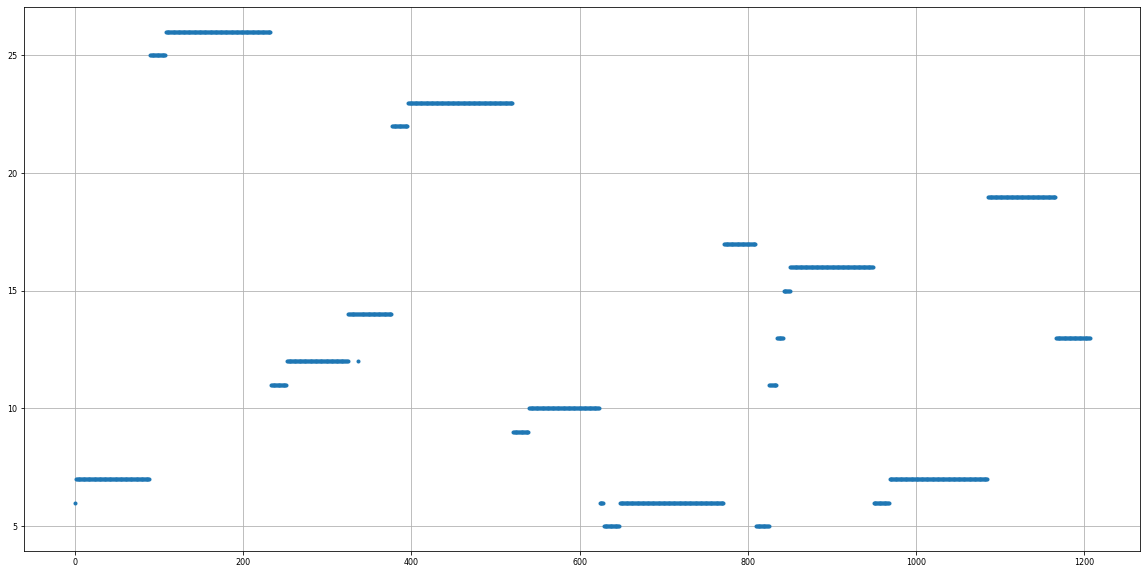

In [32]:
plt.figure(figsize=(20,10))
plt.plot(OriginalX.index.day,'.')
plt.grid()